In [1]:
from google.colab import drive
dataset_file = '/content/drive/MyDrive/Colab Notebooks/Cellula-ML-Projects/Datasets/Hotels-Booking.csv'
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd

### read dataset and remove any whitespaces from columns name

In [4]:
data = pd.read_csv(dataset_file)
data.columns = data.columns.str.strip()

In [5]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [ ]:
data.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [ ]:
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### convert 'type of meal' to numeric values where:
* Meal Plan 1 = 1
* Meal Plan 2 = 2
* Meal Plan 3 = 3
* not_selected = 4

In [ ]:
def type_of_meal(meal_plan):
    if(meal_plan == 'Meal Plan 1'):
        return 1
    if(meal_plan == 'Meal Plan 2'):
        return 2
    if(meal_plan == 'Meal Plan 3'):
        return 3
    else:
        return 4

data['type of meal'] = data['type of meal'].apply(type_of_meal)

### convert 'room type' to numeric values where:
* Room_Type 1 = 1
* Room_Type 2 = 2
* Room_Type 3 = 3
* Room_Type 4 = 4
* Room_Type 5 = 5
* Room_Type 6 = 6

In [ ]:
def room_type(room_type):
    room_type_mapping = {
        'Room_Type 1': 1,
        'Room_Type 2': 2,
        'Room_Type 3': 3,
        'Room_Type 4': 4,
        'Room_Type 5': 5,
        'Room_Type 6': 6
    }
    return int(room_type_mapping.get(room_type, 0))

data['room type'] = data['room type'].apply(room_type)

### convert 'market segment type' to numeric values where:
* Offline = 1
* Online = 2
* Corporate = 3
* Complementary = 4

In [ ]:
def market_segment_type(market_segment_type):
    market_segment_type_mapping = {
        'Offline': 1,
        'Online': 2,
        'Corporate': 3,
        'Complementary': 4
    }
    return int(market_segment_type_mapping.get(market_segment_type, 0))

data['market segment type'] = data['market segment type'].apply(market_segment_type)

### convert 'date of reservation' to datetime values

In [ ]:
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')
# remove invalid dates
data.dropna(subset=['date of reservation'], inplace=True)

### convert 'date of reservation' to int values

In [ ]:
MIN_DATE = data['date of reservation'].min()
def datetime_convert(original_date):
    return original_date - MIN_DATE

nor_date = []
for original_date in data['date of reservation']:
    nor_date.append(datetime_convert(original_date))

data['date of reservation'] = nor_date

### convert 'booking status' to numeric values where:
* Canceled = 0
* Not_Canceled = 1

In [ ]:
def booking_status(booking_status):
    if booking_status=='Not_Canceled':
        return 1
    else:
        return 0

data['booking status'] = data['booking status'].apply(booking_status)

### remove adults that equal zero and have children

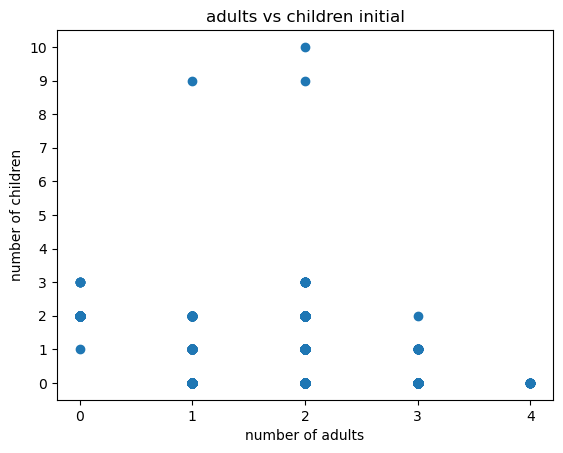

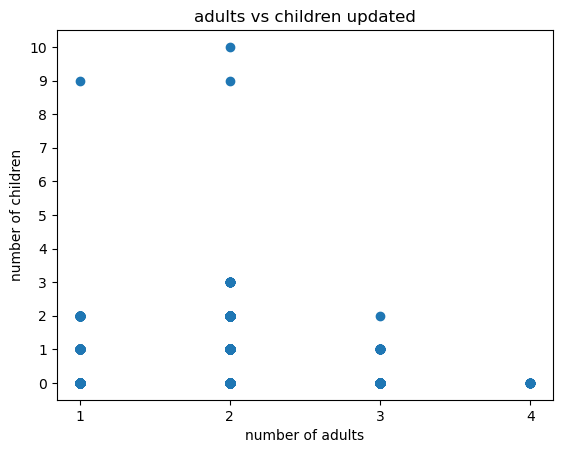

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def adults_vs_children(scatter_title):
    x = data['number of adults']
    y = data['number of children']
    plt.scatter(x, y)
    plt.xticks(np.arange(min(x), max(x)+1, 1))
    plt.yticks(np.arange(min(y), max(y)+1, 1))
    plt.xlabel('number of adults')
    plt.ylabel('number of children')
    plt.title(scatter_title)
    plt.show()

adults_vs_children('adults vs children initial')
data.drop(data[(data['number of adults'] == 0) & (data['number of children'] > 0)].index, inplace=True)
adults_vs_children('adults vs children updated')

### normalize features in range ( 0 to 1 )

In [ ]:
cols = [
'number of adults',
'number of children',
'number of weekend nights',
'number of week nights',
'type of meal',
'room type',
'lead time',
'market segment type',
'P-C',
'P-not-C',
'average price',
'special requests',
'date of reservation'
]

# normalize equation = original_value - MIN / MAX - MIN
for col_name in cols:
    data[col_name] = (data[col_name] - data[col_name].min()) / (data[col_name].max() - data[col_name].min())

### drop unnecessary feature

In [ ]:
data = data.drop('Booking_ID', axis=1)

### spilt the data to input and output

In [ ]:
data_input = data.drop('booking status', axis=True)
data_output = data['booking status']

### split the data to training, validation and testing

In [ ]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=2)
X_train,X_val, y_train, y_val = train_test_split(data_input, data_output, test_size=0.33, random_state=2)

print('X_train = ', X_train.shape)
print('X_val = ', X_val.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_val = ', y_val.shape)
print('y_test = ', y_test.shape)

X_train =  (24193, 15)
X_val =  (11916, 15)
X_test =  (11916, 15)
y_train =  (24193,)
y_val =  (11916,)
y_test =  (11916,)


### try range on tree_depth to find the best accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

rng = range(1, 31, 1)
accuracy_score_train = []
accuracy_score_val = []

for max_depth_value in rng:
    model = DecisionTreeClassifier(max_depth=max_depth_value, random_state=2)
    model.fit(X_train, y_train)

    y_predict_train = model.predict(X_train)
    y_predict_val = model.predict(X_val)
    accuracy_score_train.append(accuracy_score(y_train, y_predict_train))
    accuracy_score_val.append(accuracy_score(y_val, y_predict_val))

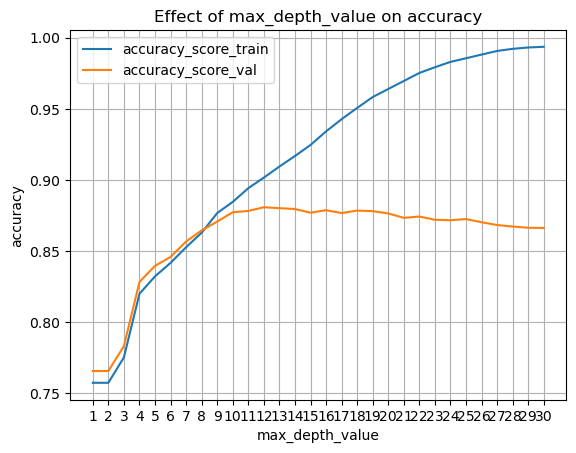

In [ ]:
plt.plot(rng, accuracy_score_train, label='accuracy_score_train')
plt.plot(rng, accuracy_score_val, label='accuracy_score_val')
plt.legend()
plt.xticks(rng)
plt.grid(axis='both')
plt.xlabel('max_depth_value')
plt.ylabel('accuracy')
plt.title('Effect of max_depth_value on accuracy')
plt.show()

In [ ]:
model_best_acc = DecisionTreeClassifier(max_depth=12, random_state=2)
model_best_acc.fit(X_train, y_train)
y_predict_test = model_best_acc.predict(X_test)
print(accuracy_score(y_test, y_predict_test))

0.8807485733467607


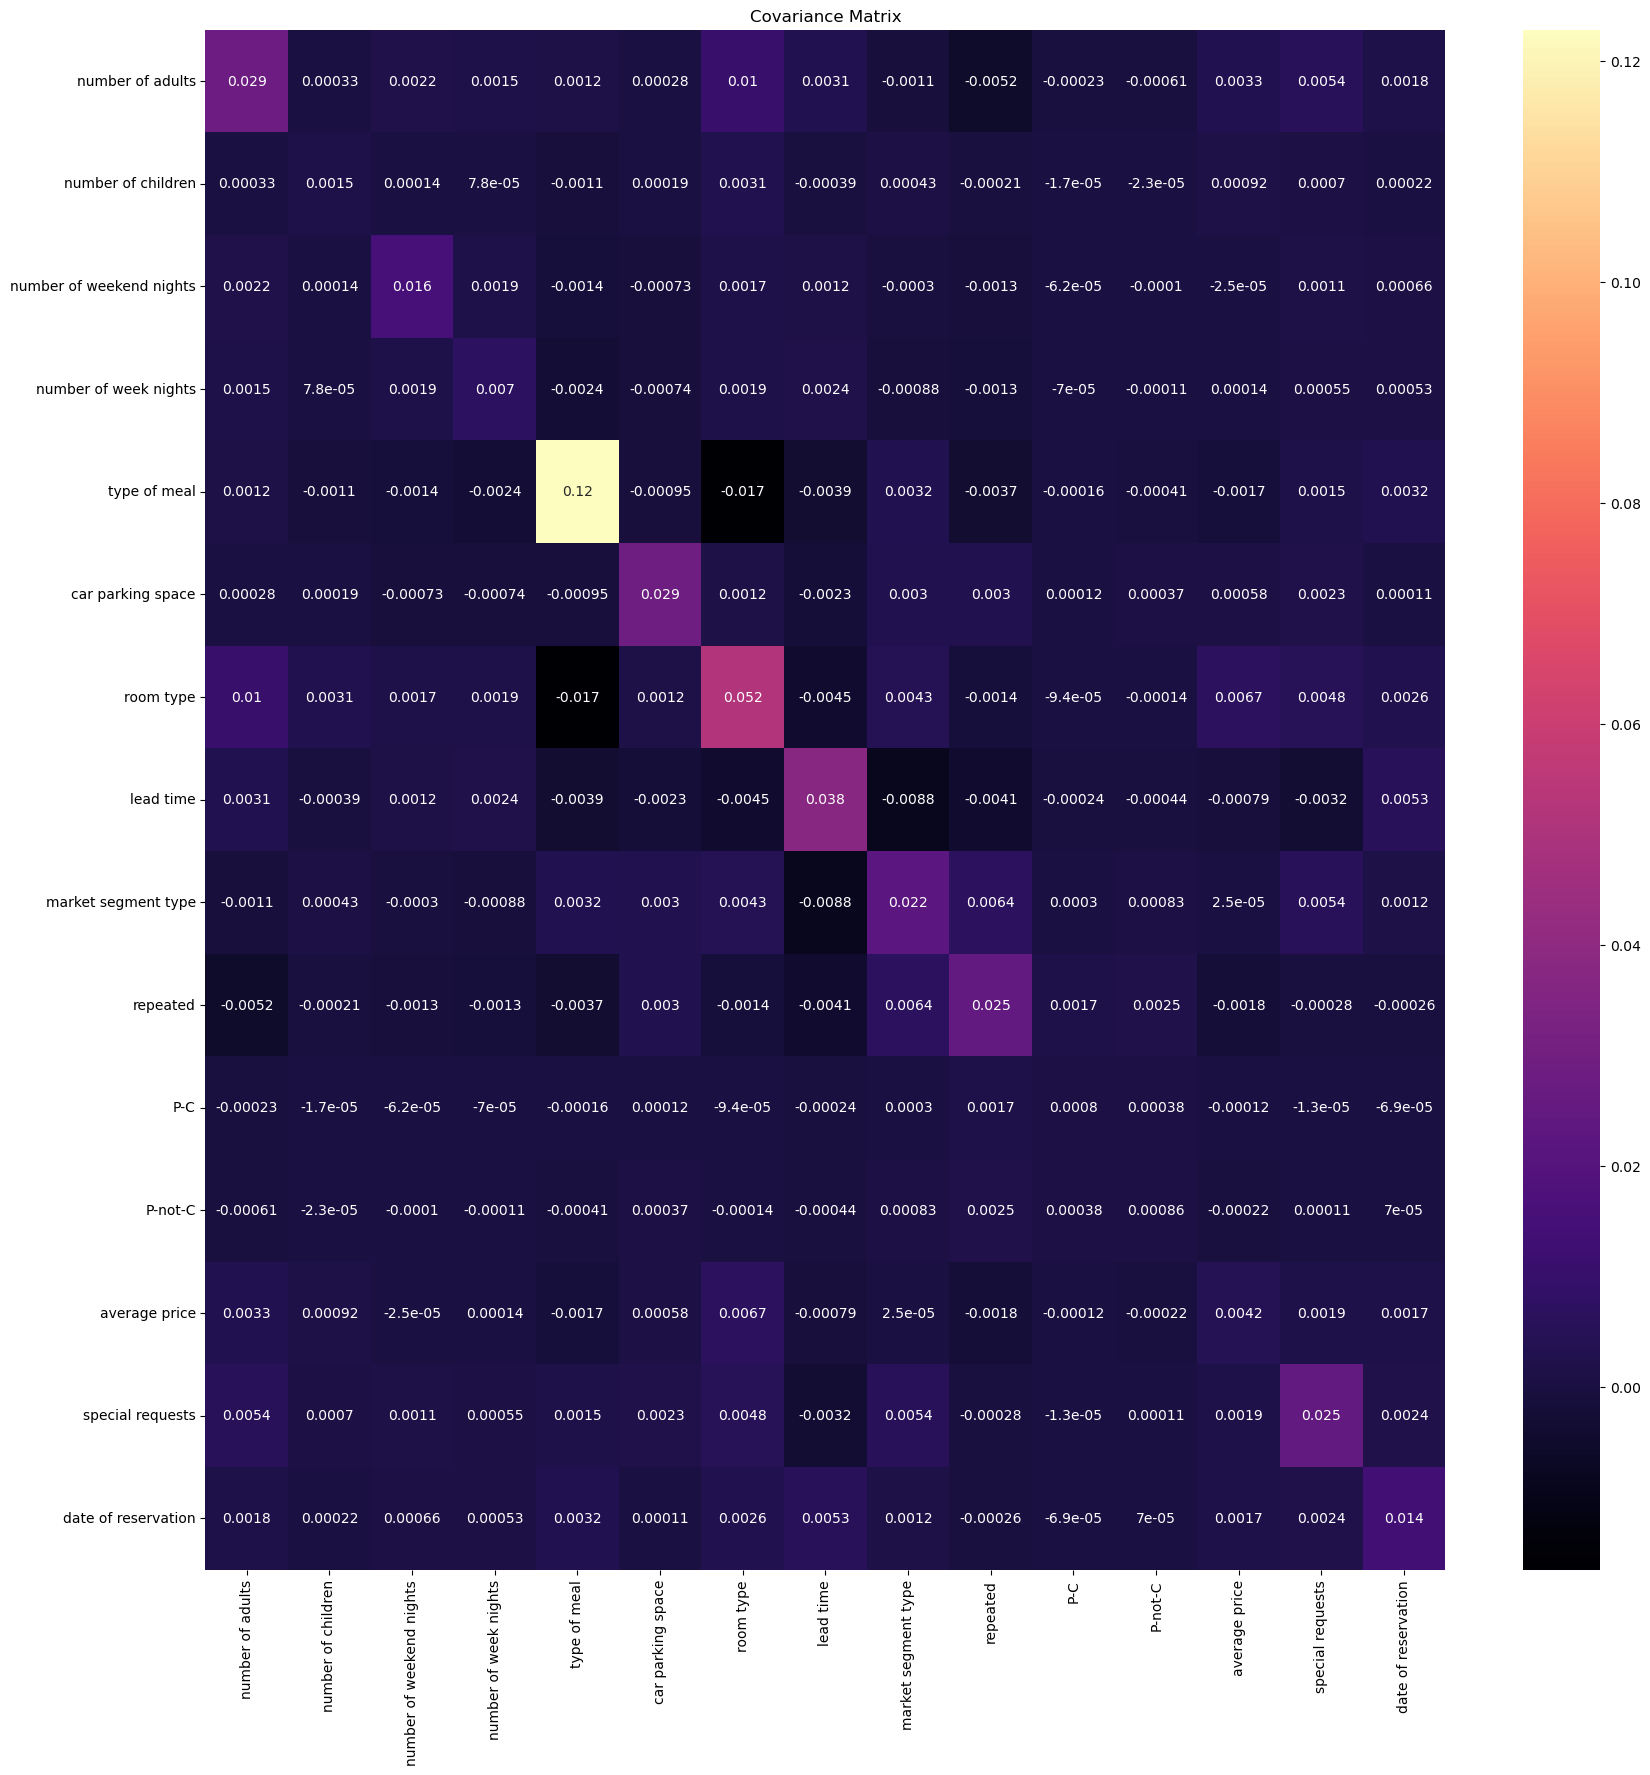

In [ ]:
import seaborn as sns

# Calculate covariance matrix
covariance_matrix = np.cov(X_train, rowvar=False)

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(covariance_matrix, annot=True, cmap='magma', xticklabels=X_train.columns, yticklabels=X_train.columns)
plt.title('Covariance Matrix')
plt.show()

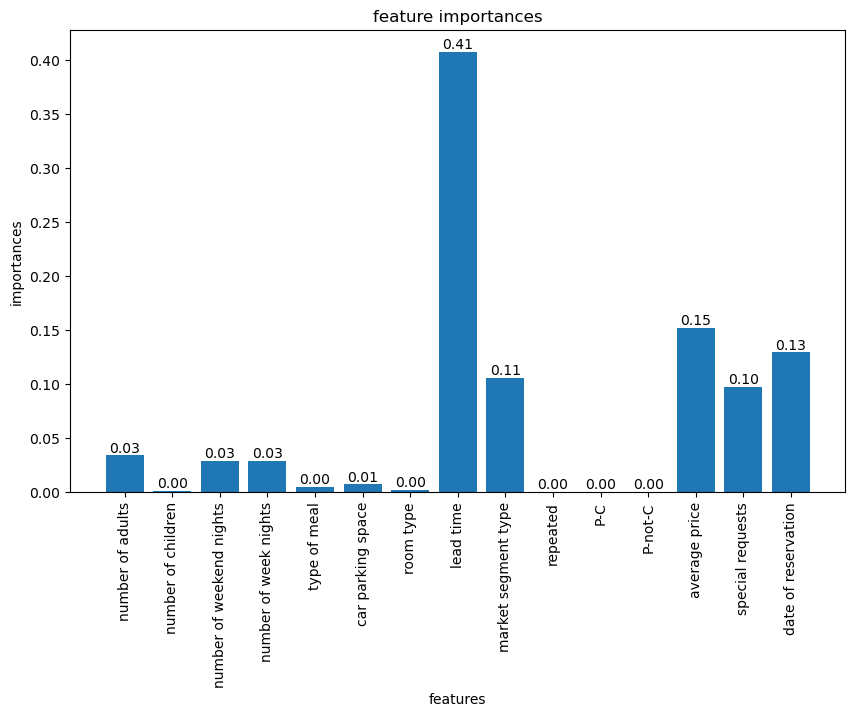

In [ ]:
feature_names=[
    'number of adults', 'number of children', 'number of weekend nights',
    'number of week nights', 'type of meal', 'car parking space',
    'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
    'P-not-C', 'average price', 'special requests', 'date of reservation']

plt.figure(figsize=(10, 6))
plt.bar(feature_names, model_best_acc.feature_importances_)
plt.xlabel('features')
plt.ylabel('importances')
plt.title('feature importances')
plt.xticks(rotation=90)

for i, v in enumerate(model_best_acc.feature_importances_):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

### re-select features according to its importance and enhancement the model accuracy

In [ ]:
selected_features = ['lead time', 'market segment type', 'average price', 'special requests', 'date of reservation']
data_input = data[selected_features].copy()


### save model in file

In [ ]:
import pickle

with open('Model.pkl', 'wb') as f:
    pickle.dump(model_best_acc, f)